# 0. import

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

# 1. 선형회귀

`-` [review](https://gangcheol.github.io/ISLP2023/posts/2023-09-09-00.%20Linear%20Regression.html) 

## (1) 데이터 로드 및 탐색

In [2]:
# 데이터 읽어오기
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

In [3]:
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [5]:
data.isnull().sum()

speed    0
dist     0
dtype: int64

`-` $(x,y)$ 시각화

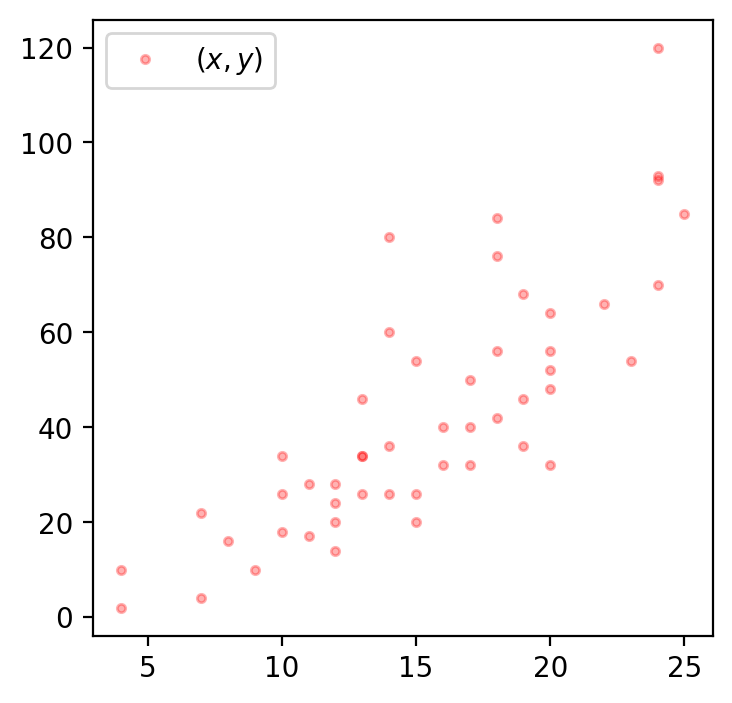

In [6]:
plt.figure(figsize = (4, 4))
plt.plot(data.speed, data.dist, ".r", label = r"$(x, y)$",alpha = 0.3)
plt.legend()

## (2) 모델링

In [7]:
#| code-fold : true
target = "dist"

## step 1. x,y 부리
x  = data.drop(target, axis = 1)
y  = data[target]

## step 2. 훈련 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

## step 3 . 모델 불러오기
from sklearn.linear_model import  LinearRegression
model1 = LinearRegression()

## step 4.  모델 fit
model1.fit(x_train, y_train)

## step 5. 예측
y_pred = model1.predict(x_test)

`-` 회귀계수 확인

In [8]:
print(model1.coef_)
print(model1.intercept_)

[3.91046344]
-16.37336414935769


`-` 산출된 회귀식

$$\text{dist} \approx 3.9 \times \text{speed} -16.37$$

`-` 결과 시각화

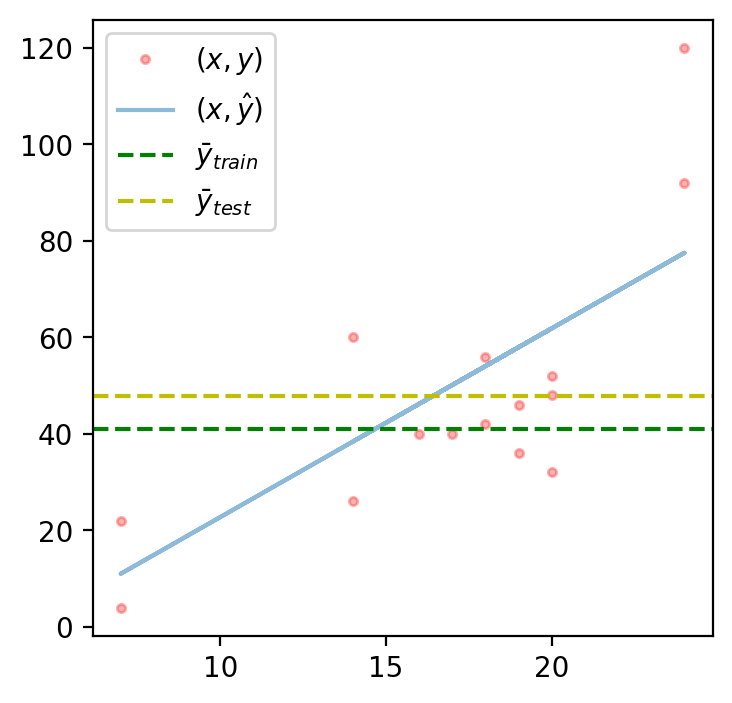

In [9]:
# | code-fold : true
plt.figure(figsize = (4,4))
plt.plot(x_test, y_test, ".r", label =r"$(x,y)$", alpha = 0.3)
plt.plot(x_test, y_pred, label =r"$(x,\hat {y})$", alpha = 0.5)
plt.axhline(y_train.mean(),linestyle = "--", color = "g", label = r"$\bar {y}_{train}$")
plt.axhline(y_test.mean(),linestyle = "--", color = "y", label = r"$\bar {y}_{test}$")
plt.legend()

`-` 예측성능확인

In [10]:
from sklearn.metrics import *

print(f"MAE :  {mean_absolute_error(y_test, y_pred) : .2f}" )
print(f"R2 : {r2_score(y_test, y_pred) : .2f}")


MAE :   15.11
R2 :  0.55


`-` 학습 데이터의 평균 성능은?

In [11]:
y_mean = y_train.mean()
y_mean = [y_mean]*len(y_pred)

print(f"MAE :  {mean_absolute_error(y_test, y_mean) : .2f}" )
print(f"R2 : {r2_score(y_test, y_mean) : .2f}")

MAE :   18.34
R2 : -0.06


## excercise. 1

### (1). 데이터 로드 및 전처리

In [12]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

In [13]:
data.isna().sum()

income       0
happiness    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


###  (2). 모델링

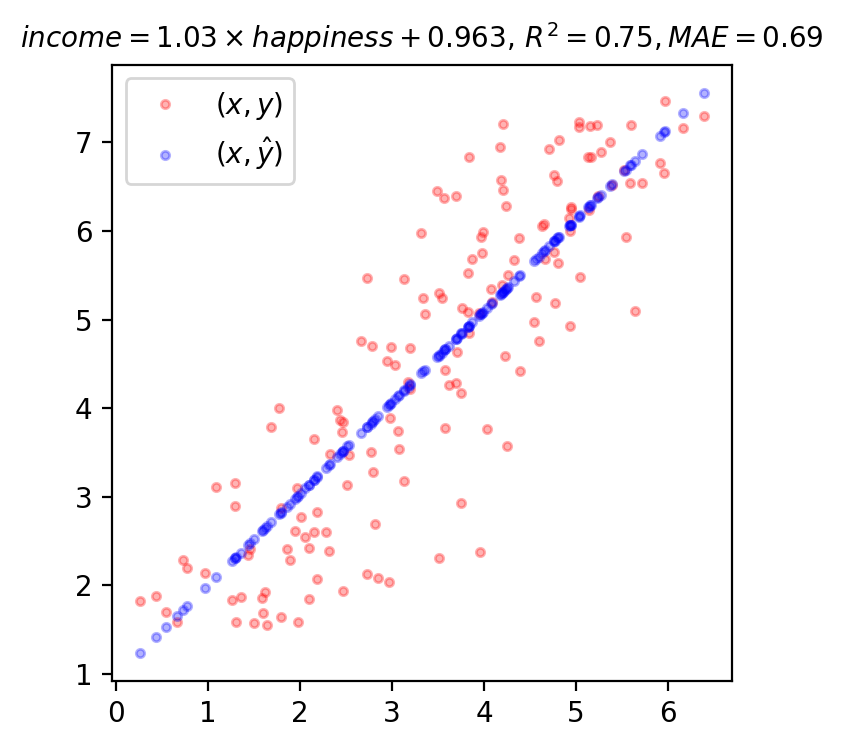

In [15]:
# | code-fold : ture

# step 1.  데이터 분리
target = "income"

x = data.drop(target, axis = 1)
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.3)

# step 2.  model 선언 
model2 = LinearRegression()

# step 3. fit
model2.fit(x_train,y_train)

# step 4. predict
y_pred = model2.predict(x_test)

r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

plt.figure(figsize=(4,4))
plt.plot(x_test, y_test, ".r", label = r"$(x,y)$", alpha = 0.3)
plt.plot(x_test, y_pred, ".b", label = r"$(x,\hat {y})$", alpha = 0.3)
plt.title(r"$income = 1.03 \times happiness + 0.963,\,   R^{2} = 0.75, MAE = 0.69$",fontsize = 10)
plt.legend()
plt.show()

## excercise. 2

**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격 (단위: 달러)
- Income: 지역 평균 소득 (단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산 (단위: 1,000달러)
- Population: 지역 인구 수 (단위: 1,000명)
- Price: 자사 지역별 판매 가격 (단위: 달러)
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Education: 각 지역 교육 수준
- Urban: 도심 지역 여부 (Yes,No)
- US: 매장이 미국에 있는지 여부 (Yes, No)

### (1) 데이터 탐색 및 전처리

In [16]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [17]:
data.select_dtypes("number").corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


`-` 컬럼 가변수화

In [18]:
d_cols = ["ShelveLoc", "Education", "Urban", "US"]


_data = pd.get_dummies(data, columns= d_cols, drop_first=True, dtype = "float")
_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,11.22,111,48,16,260,83,65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,10.06,113,35,10,269,80,59,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,7.40,117,100,4,466,97,55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4.15,141,64,3,340,128,38,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


`-` 학습용, 평가용 데이터 분리

In [19]:
target  = "Sales"
x = _data.drop(target, axis = 1)
y = _data[target]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

### (2) 모델링

In [21]:
## 1. 모델 선언
model3 = LinearRegression()

## 2. model fit
model3.fit(x_train, y_train)

## 3. predict
y_pred = model3.predict(x_test)

## 5. 결정계수 및 MAE 값 계산
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

### (3) 시각화 1 :  회귀계수

In [22]:
# | code-fold : true
x_cols = x_train.columns.values
coef = model3.coef_

fig = pd.DataFrame({"X" : x_cols,
                            "coef" : coef}).\
                                sort_values("coef",ascending=False).\
                                                        plot(x="coef", y="X",
                                                               color= "X",kind= "barh",
                                                                backend = "plotly",width = 700, height = 450)
fig.update_layout(showlegend=False)

### (4) 시각화 2 :  잔차 시각화

`-` 잔차를 살펴보니 잔차의 평균으로부터 분포가 일정하다. (회귀선이 안정적으로 추정된 것 같다!)

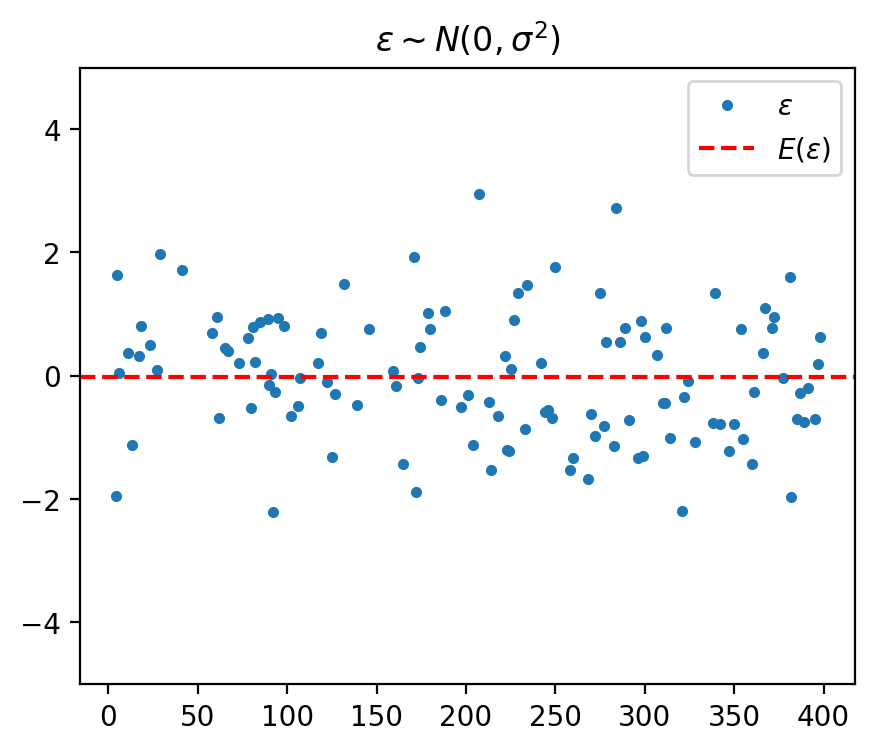

In [23]:
# | code-fold : ture
e = y_test - y_pred
e_m = e.mean()

plt.figure(figsize=(5,4))
plt.plot(e,'.',label = r"$\varepsilon$")
plt.axhline(e_m, linestyle = "--", color = "red", label = r"$E(\varepsilon)$")
plt.title(r"$\varepsilon \sim  N(0, \sigma^2)$")
plt.legend()
plt.ylim(-5,5)
plt.show()

### (4) 시각화 3 :  $(y, \hat y)$

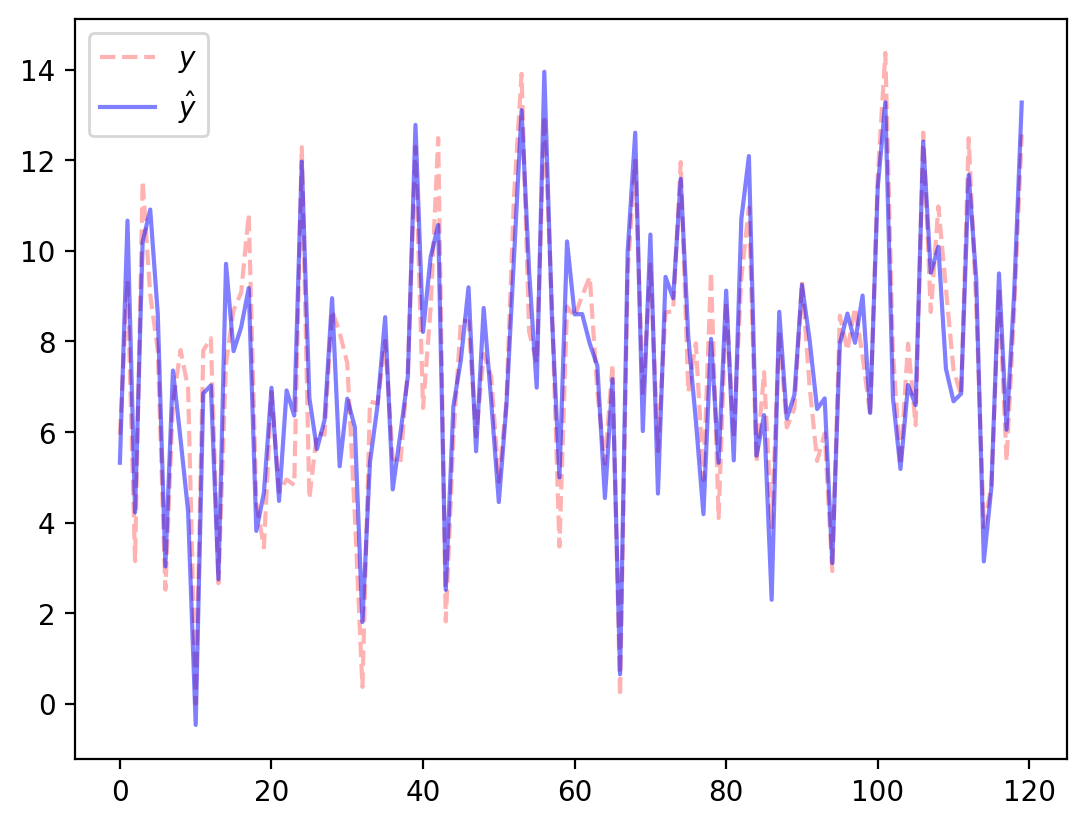

In [24]:
plt.plot(y_test.reset_index(drop=True), "--r", label = r"$y$",alpha = 0.3)
plt.plot(y_pred, "b", label = r"$\hat {y}$",alpha=0.5)
plt.legend()


# 2. KNN

`-` 학습을 안함 $\to$ 걍 옆에 있는 애들을 평균내서 값을 구해주기 때문

* 예측할 떄만 옆에 있는 녀석들과의 거리를 구해서 값을 계산함. $\to$ $\hat {y}$가 범주일 때는 예측시 투표방식, 연속형일 때는 주변을 평균내서 구함

* 그래서 KNN은 $k$가 커질수록 모델이 단순해짐.

`-` 주변 관측치 $k$ 를 홀수로 설정 $\to$ 짝수로 설정시 과반수 이상의 투표가 나오지 않을 수 있음.

`-` KNN은 스케일링 여부에 따라 모델 성능이 달라질 수 있다. $\to (1 \leq x \leq 2), (4000 \leq y \leq 10000) $

* 위의 경우 시각화로 표현 시 $y$값에 범위와 $x$값의 범위가 차이가 심하기 때문에 잘못된 분류를 할 가능성이 높다.

* 위 같은 문제점을 해결하기 위해 `scaling`이 필요하다. (근데 만약 안했을 때 성능이 좋다면 안해도 된다, 그때그때 다름)

`-` 정규화 (Normalization)

$$X_{norm} = \frac {x-x_{min}}{x_{max} - x_{min}},\quad (1  \leq X_{norm} \leq 1)$$

`-` 표준화 (standardization)

$$X_{z} = \frac {x-x_{mean}}{x_{std}},\,\quad X_{std} \sim N(0, 1)$$

## (1) 데이터 로드 및 탐색

In [25]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

In [26]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [28]:
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [29]:
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


## (2) 결측치 처리

`-` 시계열 데이터이므로 선형보간법으로 채움

In [30]:
data["Solar.R"].interpolate(method = "linear", inplace = True)

In [31]:
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

## (3) 변수 제거

In [32]:
#  변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56


## (4) 모델링

In [33]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

`-` 스케일링

In [34]:
# 1.  손계산
x_train = x_train.apply(lambda x : 
                                            (x-min(x))/(max(x)-min(x)),axis=0)

x_test = x_test.apply(lambda x : 
                                            (x-min(x))/(max(x)-min(x)),axis=0)

```python
# 2. 모듈 이용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
```

`-` 모델링 수행

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = KNeighborsRegressor()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred ): .2f}, R2 = {r2_score(y_test, y_pred): .2f} ")

MAE :  13.68, R2 =  0.57 


## (5) 결과 시각화

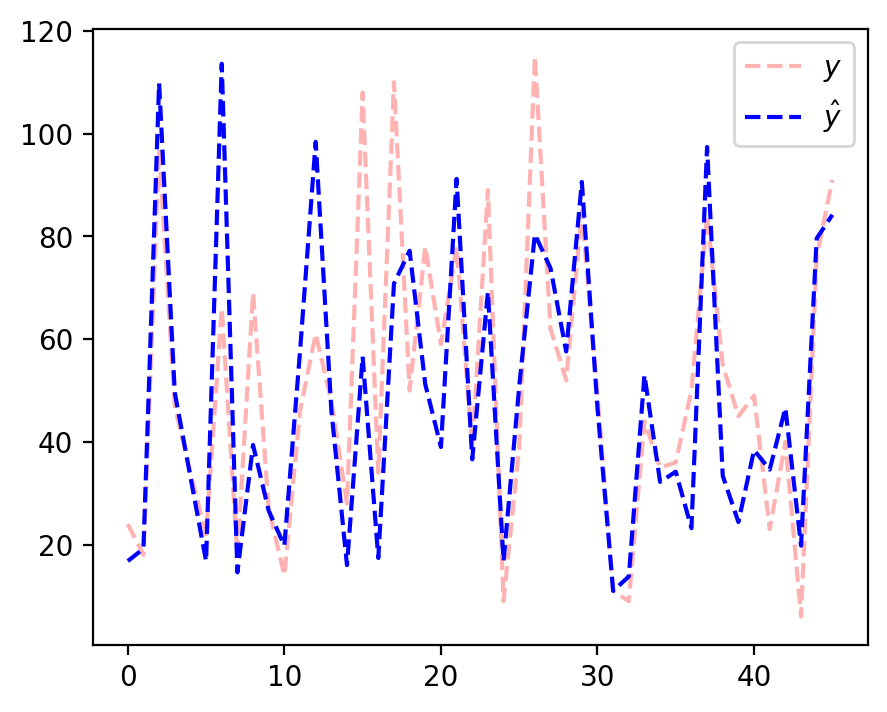

In [36]:
plt.figure(figsize = (5,4))
plt.plot(y_test.reset_index(drop=True),"--r",label = r"$y$",alpha = .3)
plt.plot(y_pred,"--b",label = r"$\hat y$")
plt.legend()

## exercise. 1

### (1) 데이터 탐색 및 전처리

**데이터설명**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다.
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다.
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

In [37]:
path = 'https://raw.githubusercontent.com/jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### (2) 모델링

In [41]:
# step 1. 데이터 분리
target = "Outcome"

x = data.drop(target, axis=1)
y = data[target]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

# step 2.  정규화

scale = lambda  x : (x-min(x)) /(max(x)-min(x))

x_train = x_train.apply(scale, axis=0)
x_test = x_test.apply(scale, axis=0)

# step 3. 모델 호출 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"accuracy : {accuracy_score(y_pred, y_test) : .3}")
print(f"precision : {precision_score(y_pred, y_test) : .3}")
print(f"recall : {recall_score(y_pred, y_test) : .3}")
print(f"F1-score : {f1_score(y_pred, y_test) : .3}")

accuracy :  0.779
precision :  0.506
recall :  0.827
F1-score :  0.628


### (3) 결과 시각화 1 : $(y, \hat y)$ 클래스 비교

In [42]:
pd.DataFrame({"y_test" : y_test.astype(str),
                             "y_pred" : y_pred.astype(str)}).\
                                    melt(var_name = "label", 
                                     value_name= "Outcome").\
                                     groupby("label",as_index=False)[["Outcome"]].value_counts().\
                                            plot(x = "label",y = "count", 
                                                    kind ="bar", backend = "plotly",
                                                     color = "label", facet_col = "Outcome",width = 500, height = 400)

### (4) 결과 시각화 2 : 평가지표

In [43]:
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

result = [acc, pre, recall, f1]
col = ["accuracy", "precision", "recall", "F1-score"]

pd.DataFrame(result,columns=["value"],index=col).reset_index().\
                plot(x="index", y= "value",kind="bar",color= "index", backend = "plotly",
                        height = 400, width = 600)

## excercise. 2 (불균형 클래스)

**데이터 설명**

- Attrition: 이직 여부 (1: 이직, 0: 잔류)
- Age: 나이
- DistanceFromHome: 집-직장 거리 (단위: 마일)
- EmployeeNumber: 사번
- Gender: 성별 (Male, Female)
- JobSatisfaction: 직무 만족도(1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus: 결혼 상태 (Single, Married, Divorced)
- MonthlyIncome: 월급 (단위: 달러)
- OverTime: 야근 여부 (Yes, No)
- PercentSalaryHike: 전년 대비 급여 인상율(단위: %)
- TotalWorkingYears: 총 경력 연수

### (1) 데이터 로드 및 탐색

In [44]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition          1196 non-null   int64 
 1   Age                1196 non-null   int64 
 2   DistanceFromHome   1196 non-null   int64 
 3   EmployeeNumber     1196 non-null   int64 
 4   Gender             1196 non-null   object
 5   JobSatisfaction    1196 non-null   int64 
 6   MaritalStatus      1196 non-null   object
 7   MonthlyIncome      1196 non-null   int64 
 8   OverTime           1196 non-null   object
 9   PercentSalaryHike  1196 non-null   int64 
 10  TotalWorkingYears  1196 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 102.9+ KB


In [46]:
data.isna().sum()

Attrition            0
Age                  0
DistanceFromHome     0
EmployeeNumber       0
Gender               0
JobSatisfaction      0
MaritalStatus        0
MonthlyIncome        0
OverTime             0
PercentSalaryHike    0
TotalWorkingYears    0
dtype: int64

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,1196.0,0.163043,0.369560,0.0,0.00,0.0,0.00,1.0
Age,1196.0,36.943980,9.092700,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,1196.0,9.258361,8.166016,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1196.0,1035.629599,604.340130,1.0,507.75,1028.0,1581.25,2068.0
JobSatisfaction,1196.0,2.716555,1.110962,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1196.0,6520.104515,4665.902253,1009.0,2928.25,4973.5,8420.50,19999.0
PercentSalaryHike,1196.0,15.251672,3.625946,11.0,12.00,14.0,18.00,25.0
TotalWorkingYears,1196.0,11.330268,7.823821,0.0,6.00,10.0,15.00,40.0


In [48]:
data.select_dtypes("number").corr()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
Attrition,1.000000,-0.167866,0.081973,-0.008707,-0.078936,-0.163572,-0.000048,-0.182162
Age,-0.167866,1.000000,-0.010917,-0.023786,-0.012425,0.490107,-0.008303,0.674331
DistanceFromHome,0.081973,-0.010917,1.000000,0.054948,-0.021623,-0.012803,0.052348,0.002606
EmployeeNumber,-0.008707,-0.023786,0.054948,1.000000,-0.022863,-0.014032,-0.009514,-0.016317
JobSatisfaction,-0.078936,-0.012425,-0.021623,-0.022863,1.000000,-0.025082,0.030811,-0.039380
MonthlyIncome,-0.163572,0.490107,-0.012803,-0.014032,-0.025082,1.000000,-0.021334,0.768437
PercentSalaryHike,-0.000048,-0.008303,0.052348,-0.009514,0.030811,-0.021334,1.000000,-0.021988
TotalWorkingYears,-0.182162,0.674331,0.002606,-0.016317,-0.039380,0.768437,-0.021988,1.000000


### (2) 데이터 준비

`-` 변수 제거

In [49]:
data.drop("EmployeeNumber", axis=1, inplace =True)
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


`-` x, y 분리

In [50]:
target = "Attrition"

x = data.drop(target, axis=1)
y = data[target]

`-` 가변수화

In [51]:
dum_col = ["Gender", "JobSatisfaction", "MaritalStatus", "OverTime"]

x = pd.get_dummies(x, columns = dum_col, drop_first= True, dtype = float)

In [52]:
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


`-` 학슴용 평가 데이터 분리

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y.astype(str), random_state = 1, test_size = 0.3)

`-` 정규화

In [54]:
scale = lambda  x : (x - min(x))/(max(x)-min(x))

x_train = x_train.apply(scale, axis =  0)
x_test = x_test.apply(scale, axis =  0)
x_train.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
567,0.214286,0.321429,0.248997,0.000000,0.150,0.0,0.0,0.0,1.0,1.0,0.0,1.0
330,0.547619,0.071429,0.416244,0.000000,0.350,1.0,1.0,0.0,0.0,0.0,0.0,0.0
785,0.285714,0.071429,0.084758,0.000000,0.200,0.0,0.0,0.0,0.0,0.0,1.0,1.0
11,0.357143,0.500000,0.662814,0.071429,0.375,1.0,0.0,1.0,0.0,1.0,0.0,1.0
885,0.380952,0.071429,0.353863,0.428571,0.175,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### (3) 모델링

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = KNeighborsClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

### (4) 결과 시각화 1 : $(y, \hat y)$ 클래스 비교

In [56]:
fig = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred}).\
                        melt(var_name = "label",value_name = "Attrition").\
                            groupby("label",as_index=False)[["Attrition"]].value_counts().\
                                plot(x="label",y= "count", backend = "plotly",
                                        facet_col = "Attrition", kind="bar",color = "label",height = 400, width = 600)
fig

### (5) 결과 시각화 2 : 평가지표

In [57]:
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test, pos_label = "1")
recall = recall_score(y_pred, y_test,pos_label = "1")
f1 = f1_score(y_pred, y_test,pos_label = "1")

result = [acc, pre, recall, f1]
col = ["accuracy", "precision", "recall", "F1-score"]

pd.DataFrame(result,columns=["value"],index=col).reset_index().\
                plot(x="index", y= "value",kind="bar",color= "index", backend = "plotly",
                        height = 400, width = 600)


# 3. Decision Tree

`-` 특징

1. 특정 변수에 대한 의사결정 규칙을 나무 가지가 뻗는 형태로 분류해 나감

2. 분류와 회귀 모두에 사용되는 지도학습 알고리즘

3. 분석 과정이 직관적이며, 이해와 설명하기가 쉬움

4. 스케일링 등의 전처리 영향도가 크지 않음

5. 분석 과정을 실제로 눈으로 확인할 수 있음 → 화이트박스 모델

6. 훈련 데이터에 대한 제약 사항이 거의 없는 유연한 모델
     
     * 과적합으로 모델 성능이 떨어지기 쉬움
     
     * 트리 깊이를 제한하는(=가지치기) 튜닝이 필요

`-` 용어

1. Root Node(뿌리 마디): 전체 자료를 갖는 시작하는 마디

2. Child Node(자식 마디): 마디 하나로부터 분리된 2개 이상의 마디

3. Parent Node(부모 마디): 주어진 마디의 상위 마디

4. Terminal Node(끝 마디): 자식 마디가 없는 마디(=Leaf Node)

5. Internal Node(중간 마디): 부모 마디와 자식 마디가 모두 있는 마디

6. Branch(가지): 연결되어 있는 2개 이상의 마디 집합

7.  Depth(깊이): 뿌리 마디로부터 끝 마디까지 연결된 마디 개수

`-` 비용함수 1. 지니 불순도

$$\text {Gini}  = 1 - \sum_{i=1}^{c} (p_i)^2$$

* 완벽하게  섞이면 $\to$ 1

* 반반 섞이면 $\to$ 0.5

`-` 비용함수 2. 엔트로피

$$\text {Entropy} = -\sum_{i=1}^m p_i \log_2 p_i$$

* 완벽하게  섞이면 $\to$ 1

* 반반 섞이면 $\to$ 0.5

`-` **정보이득**

* 엔트로피는 단지 속성의 불순도를 표현한다.

* 우리가 알고 싶은것은 **"어떤 feature가 얼마나 많은 정보를 제공하는가!"** 이다.

$$Gain(T,X) = Entropy(T) - Entropy(T,X)$$

* 어떤 피처에서 $Gain(T,X)$가 크다는 것은 불순도가 작다는 것을 의미한다.

* 일단 모든 속성에 대해 분할 후 Gain을 계산 후, Gain이 가장 큰 속성부터 분할!

`-`  가지치기  : 과적합을 막기 위한 방법

* max_depth : tree의 깊이

* **min_samples_leaf(default = 1)** : leaf 노드가 되기 위한 최소한의 샘플 수
    * 불균형 클래인 경우 이를 고려하여 작은 앖을 설정할 필요가 있음

* **min_samples_split(default = 2)** : 노드를 분할하기 위한 최소한의 샘플 개수 (값을 작게 설정할 수록 계속 분할되어, 과적합 발생이 가능)

* **max_feature** : 최선의 분할을 위해 고려할 Feature 수
    * sqrt : 전체 변수의 루트값
    * auto : sqrt와 같은 의미
    * log : $\log_2 \text{(전체 변수의 수)}$
    * max_leaf_node : 리프 노드의 최대 개수

## 실습

### (1) 데이터 로드 및 탐색

In [58]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv'
data = pd.read_csv(path)

In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [62]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
data.select_dtypes("number").corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [64]:
# 제거 대상: PassengerId, Name, Ticket, Cabin
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# 변수 제거
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [65]:
# Age 결측치를 중앙값으로 채우기
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

In [66]:
# Embarked 최빈값으로 채우기
emb_freq = data['Embarked'].mode()[0]
data['Embarked'].fillna(emb_freq, inplace=True)

In [67]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [68]:
# 가변수화 대상: Pclass, Sex, Embarked
dumm_cols = ['Pclass', 'Sex', 'Embarked']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,True,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,True,False,False,True
3,35.0,1,0,53.1000,False,False,False,False,True
4,35.0,0,0,8.0500,False,True,True,False,True


In [69]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### (2) 모델링

In [70]:
# step 1.  모듈 로드
from sklearn.tree import DecisionTreeClassifier

# step 2.  선언하기

model = DecisionTreeClassifier(max_depth = 5)

# step 3. 학습하기

model.fit(x_train, y_train)

# step 4.  예측하기
y_pred = model.predict(x_test)

# step 5. 평가하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

### (3) 시각화 1 : 평가지표

In [71]:
fig = pd.DataFrame({"score" : [acc,pre,recall,f1_score],
                            "measure" : ["acc","precision","recall","f1_score"]}).\
                                    plot(x = "measure", y = "score",  color = "measure",
                                            backend = "plotly", kind =  "bar",height = 500, width = 600)
fig.update_yaxes(range = [0.5, 0.85])

### (4) 시각화 2 : tree 모델

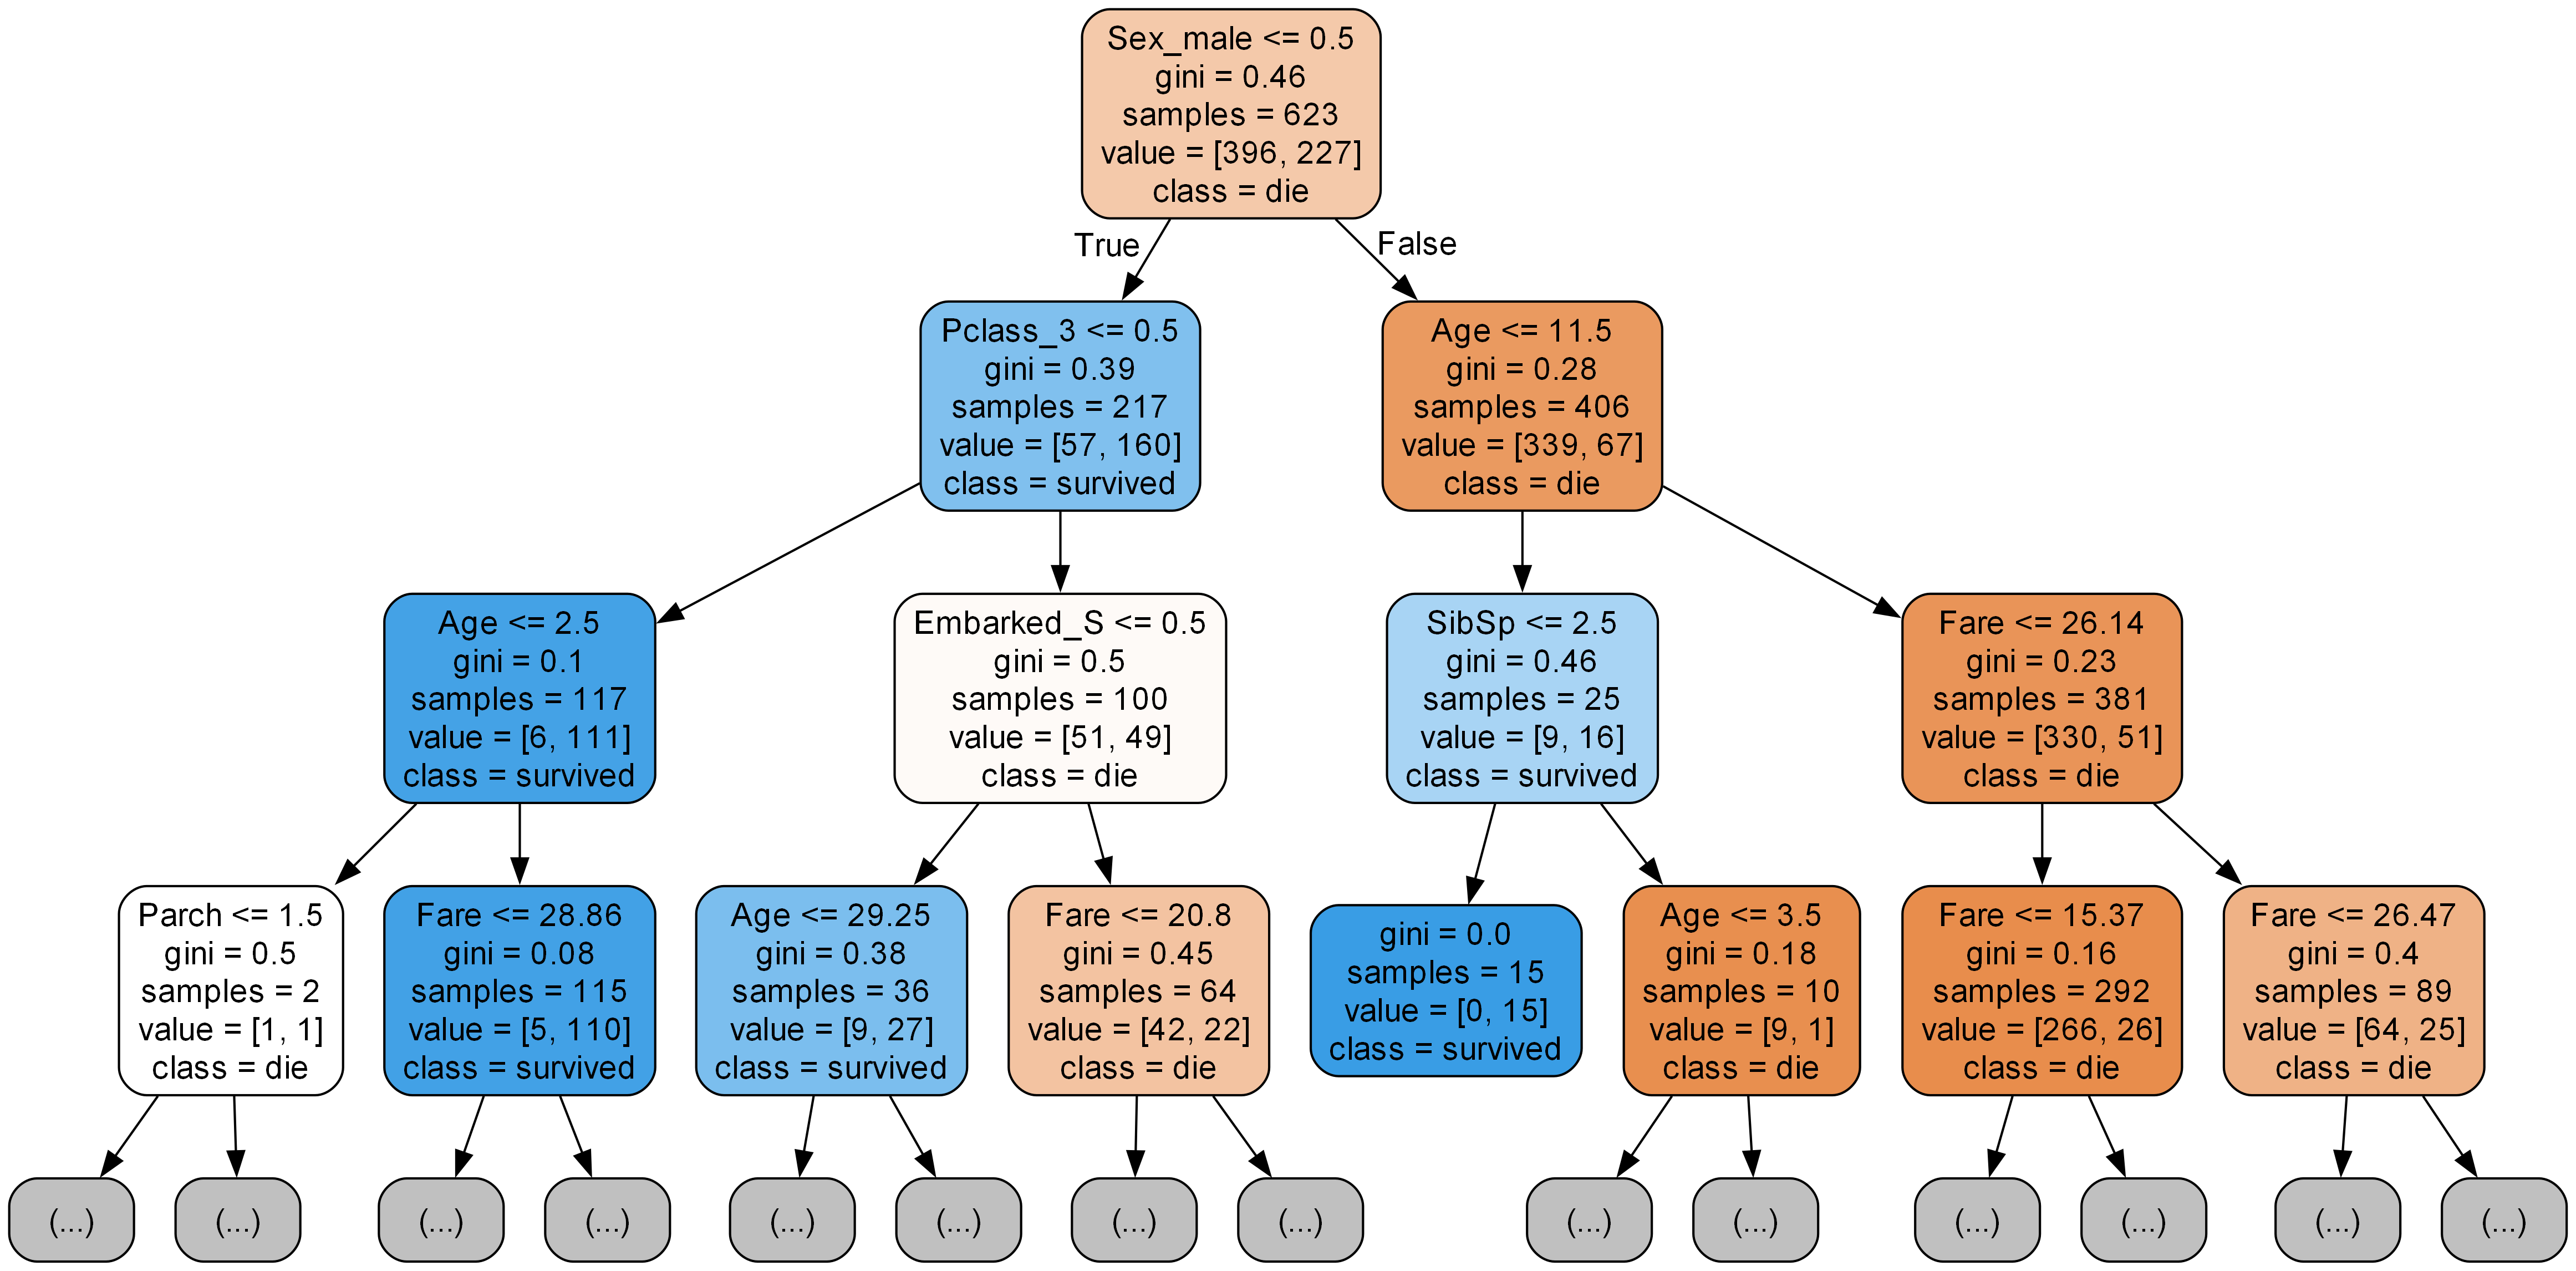

In [72]:
# | code-fold : true
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,                                 # 모델 이름
                out_file='tree.dot',                   # 파일 이름
                feature_names=x.columns,               # Feature 이름
                class_names=['die', 'survived'],       # Target Class 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                filled=True,                              # 박스 내부 채우기
                max_depth=3)                         # 그래프에 표시할 트리의 깊이

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

### (5) 시각화 3 : 변수 중요도

In [73]:
ipt = model.feature_importances_
pd.DataFrame({"importance" : ipt, "var" : list(x)}).\
                            sort_values("importance", ascending = False).\
                            plot( x = "importance", y= "var", 
                                     kind = "barh", backend = "plotly",
                                     height = 400, width = 600,color = "var")

## excercise. 1

### (1) 데이터 로드 및 탐색

**데이터 설명**

- COLLEGE: 대학 졸업여부
- INCOME: 연수입
- OVERAGE: 월평균 초과사용 시간(분)
- LEFTOVER: 월평균 잔여시간비율(%)
- HOUSE: 집값
- HANDSET_PRICE: 스마트폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월평균 장기통화(15분이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화 시간
- REPORTED_SATISFACTION: 만족도 설문조사 결과
- REPORTED_USAGE_LEVEL: 사용도 자가진단 결과
- CONSIDERING_CHANGE_OF_PLAN: 향후 변경계획 설문조사 결과
- CHURN: 이탈(번호이동) 여부 (Target 변수)

In [74]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           20000 non-null  int64 
 1   COLLEGE                      20000 non-null  int64 
 2   INCOME                       20000 non-null  int64 
 3   OVERAGE                      20000 non-null  int64 
 4   LEFTOVER                     20000 non-null  int64 
 5   HOUSE                        20000 non-null  int64 
 6   HANDSET_PRICE                20000 non-null  int64 
 7   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 8   AVERAGE_CALL_DURATION        20000 non-null  int64 
 9   REPORTED_SATISFACTION        20000 non-null  object
 10  REPORTED_USAGE_LEVEL         20000 non-null  object
 11  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 12  CHURN                        20000 non-null  object
dtypes: int64(9), object(4)
memory u

In [76]:
data["CHURN"].value_counts()

CHURN
STAY     10148
LEAVE     9852
Name: count, dtype: int64

In [77]:
data.select_dtypes("number").corr()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
id,1.000000,-0.005557,0.003686,-0.006050,0.006069,0.011347,-0.007838,0.001254,-0.005830
COLLEGE,-0.005557,1.000000,0.011122,-0.003091,-0.003925,-0.000217,0.009950,-0.007205,-0.001490
INCOME,0.003686,0.011122,1.000000,0.000458,0.006515,-0.010964,0.727200,0.002136,-0.007219
OVERAGE,-0.006050,-0.003091,0.000458,1.000000,-0.003123,0.002412,0.000324,0.770557,0.000653
LEFTOVER,0.006069,-0.003925,0.006515,-0.003123,1.000000,0.006530,0.004004,-0.010411,-0.660285
HOUSE,0.011347,-0.000217,-0.010964,0.002412,0.006530,1.000000,-0.007756,0.007410,-0.009359
HANDSET_PRICE,-0.007838,0.009950,0.727200,0.000324,0.004004,-0.007756,1.000000,0.002680,-0.005190
OVER_15MINS_CALLS_PER_MONTH,0.001254,-0.007205,0.002136,0.770557,-0.010411,0.007410,0.002680,1.000000,0.007769
AVERAGE_CALL_DURATION,-0.005830,-0.001490,-0.007219,0.000653,-0.660285,-0.009359,-0.005190,0.007769,1.000000


In [78]:
data.isna().sum()

id                             0
COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64

#### (a). 데이터 준비

`-` 변수 제거

In [79]:
_data = data.drop("id", axis = 1).copy()
_data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


`=`  x, y 분리

In [80]:
target = "CHURN"

x = _data.drop(target, axis = 1)
y = _data[target]

`-` 가변수화

In [81]:
d_cols = ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"]

x = pd.get_dummies(x, columns = d_cols, drop_first = True, dtype = float)

`-`  훈련, 평가 데이터 분리

In [82]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### (2) 모델링

In [83]:
from sklearn.tree import DecisionTreeClassifier

# step 1. 모델 선언
model  = DecisionTreeClassifier(max_depth = 5,random_state=1)
# step 2.  모델 fit
model.fit(x_train,y_train)

# step 3. 모델 pred
y_pred = model.predict(x_test)

# step 4.  평가지표 산출
from sklearn import metrics
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test, pos_label = "LEAVE")
rec =  recall_score(y_pred, y_test,  pos_label = "LEAVE")
f1 = metrics.f1_score(y_test,y_pred, pos_label = "LEAVE")

### (3) 시각화 1 : 평가지표

In [84]:
fig = pd.DataFrame({"score" : [acc,pre,recall,f1_score],
                            "measure" : ["acc","precision","recall","f1_score"]}).\
                                    plot(x = "measure", y = "score",  color = "measure",
                                            backend = "plotly", kind =  "bar",height = 500, width = 600)
fig.update_yaxes(range = [0.5, 0.71])

### (4) 시각화 2 : tree 모델

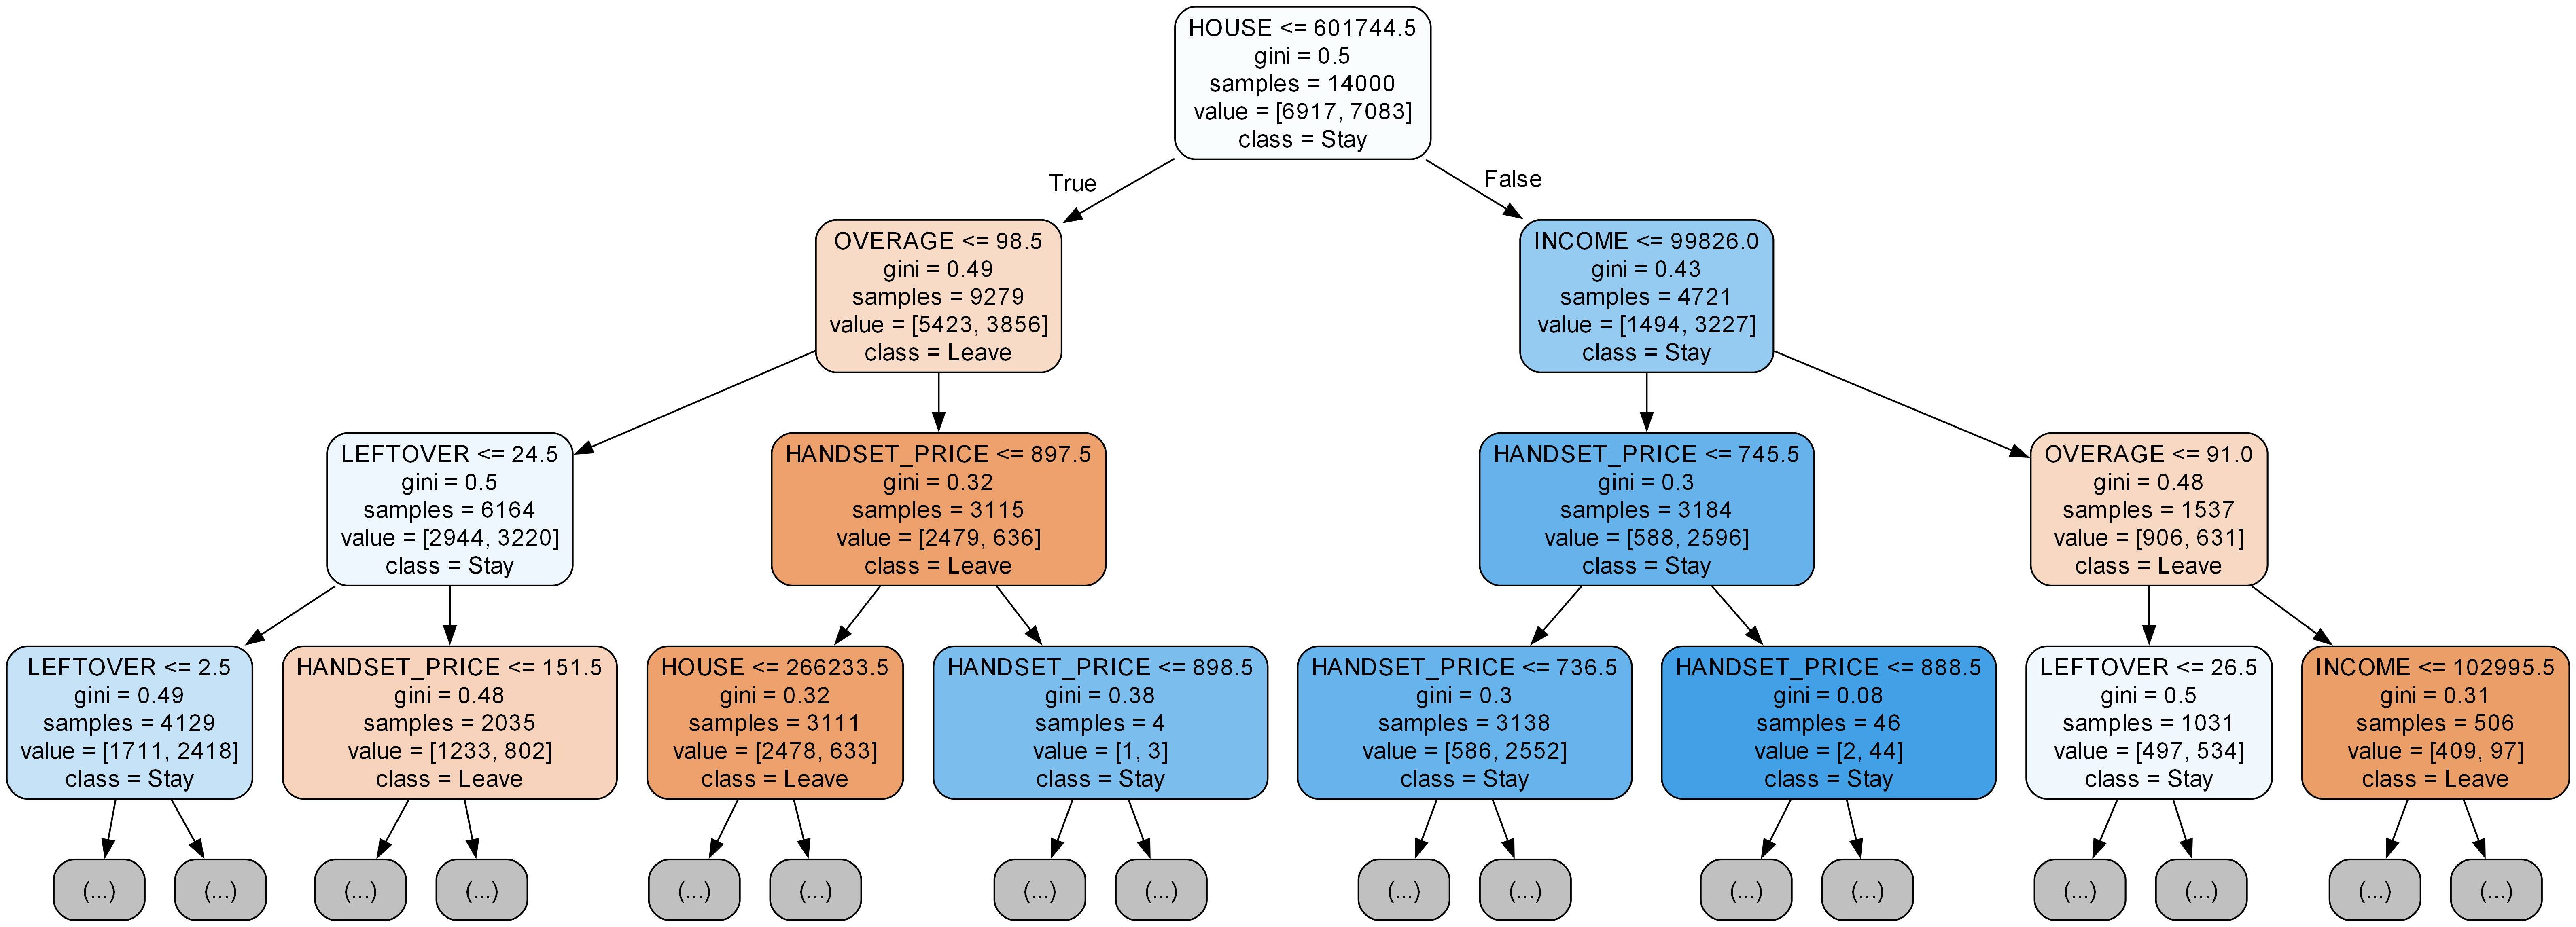

In [85]:
# | code-fold : true
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,                                 # 모델 이름
                out_file='tree.dot',                   # 파일 이름
                feature_names=x.columns,               # Feature 이름
                class_names=['Leave', 'Stay'],       # Target Class 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                filled=True,                              # 박스 내부 채우기
                max_depth=3)                         # 그래프에 표시할 트리의 깊이

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

### (5) 시각화 3 : 변수 중요도

In [86]:
ipt = model.feature_importances_
fig = pd.DataFrame({"importance" : ipt, "var" : list(x)}).\
                            sort_values("importance", ascending = False).\
                            plot( y = "importance", x= "var", 
                                     kind = "bar", backend = "plotly",
                                     height = 400, width = 600,color = "var")
fig.update_layout(showlegend = False)
fig.update_xaxes(showticklabels=False)

## excercise. 2

### (1) 데이터 로드 및 탐색

**데이터설명**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다.
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다.
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

In [87]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [92]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### (2) 데이터 분리

In [93]:
target = "Outcome"

x = data.drop(target, axis = 1)
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state = 1, test_size = 0.3)

### (3)  모델링

In [94]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

acc, pre, re, f1 = accuracy_score(y_test,y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred)

### (4) 시각화 1. 평가지표

`-` 걍함수로 만들자...

In [95]:
def score(range = [0.5, 0.71]) : 
            fig = pd.DataFrame({"score" : [acc,pre,recall,f1_score],
                            "measure" : ["acc","precision","recall","f1_score"]}).\
                                    plot(x = "measure", y = "score",  color = "measure",
                                            backend = "plotly", kind =  "bar",height = 500, width = 600)
            fig.update_yaxes(range = range)
            return fig

In [96]:
score()

### (5) 시각화 2 : tree 모델

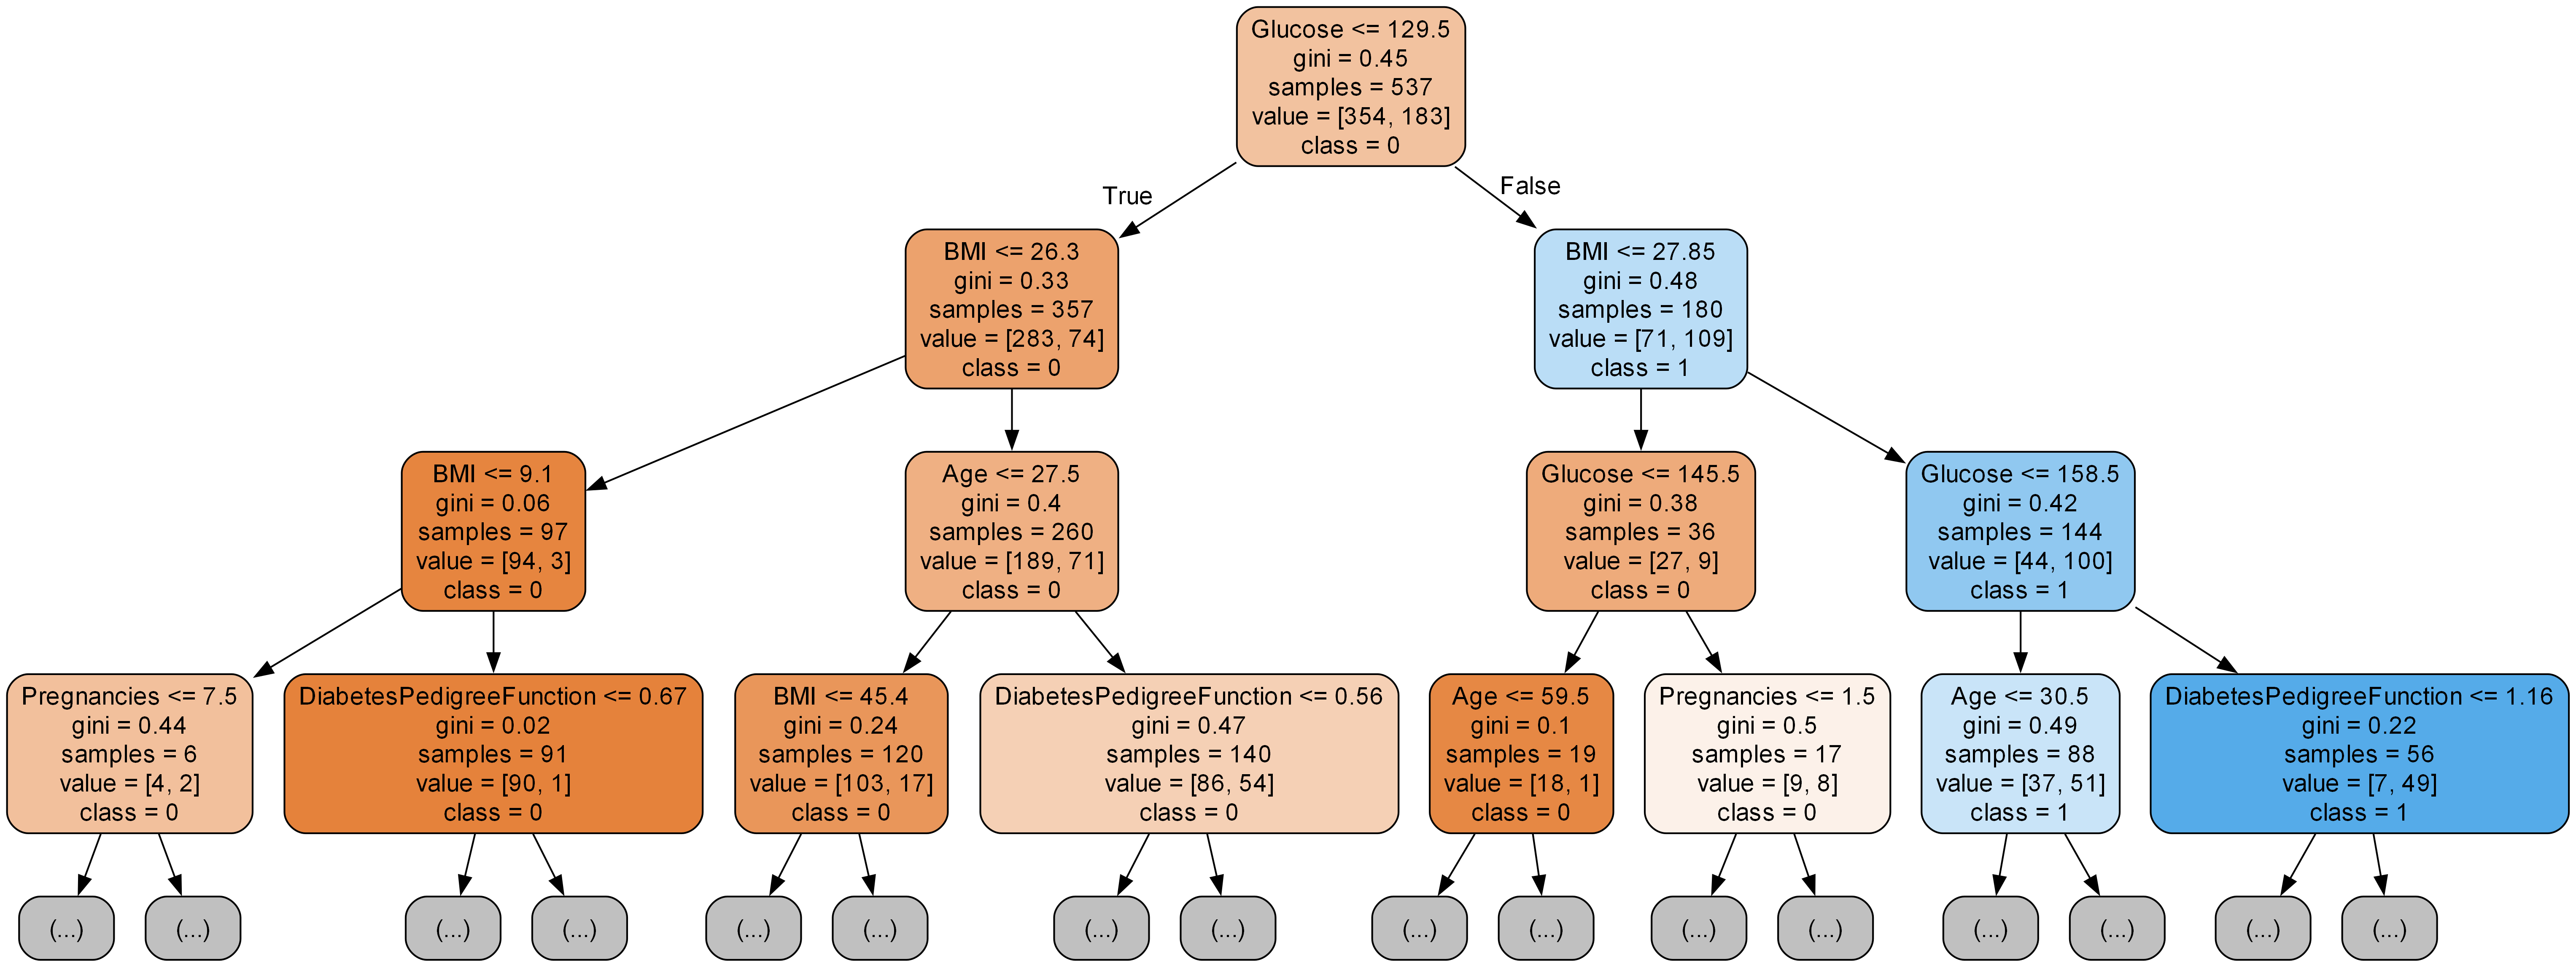

In [97]:
# | code-fold : true
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,                                 # 모델 이름
                out_file='tree.dot',                   # 파일 이름
                feature_names=x.columns,               # Feature 이름
                class_names=['0', '1'],       # Target Class 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                filled=True,                              # 박스 내부 채우기
                max_depth=3)                         # 그래프에 표시할 트리의 깊이

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

### (5) 시각화 3 : 변수 중요도

In [98]:
def importance(x,model) :
        ipt = model.feature_importances_
        fig = pd.DataFrame({"importance" : ipt, "var" : list(x)}).\
                                sort_values("importance", ascending = False).\
                                plot( y = "importance", x= "var", 
                                        kind = "bar", backend = "plotly",
                                         height = 400, width = 600,color = "var", title="".join([i for i in str(model) if i.isalpha()]))
        fig.update_layout(showlegend = False)
        fig.update_xaxes(showticklabels=True)
        return fig

In [99]:
importance(x,model)

# 4. Logistic Regression

`-` [이론링크](https://gangcheol.github.io/ISLP2023/posts/2023-09-09-01.%20classification.html#classification)

## (1) 데이터 로드 및 탐색

In [100]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

In [101]:
# 상위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [102]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [103]:
# 범주값 개수 확인
data['ADMIT'].value_counts()

ADMIT
0    282
1    218
Name: count, dtype: int64

In [104]:
# 상관관계 확인
data.corr()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


## (2) 데이터 준비

In [105]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [106]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## (3) 모델링

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# step1. model 선언
model  = LogisticRegression()

# step2. fit
model.fit(x_train, y_train)

# step3 . 얘측
y_pred = model.predict(x_test)

# step 4. 성능 지표 산출
acc, pre, recall, f1_score = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

In [108]:
score(range = [0.7, 0.87])

## (4) extra : 확률값 구한 후 결과 계산

In [109]:
p = model.predict_proba(x_test)

my_pred = [1 if x > 0.5 else 0 for x in p[:,1]]